In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 
from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df_sampled = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

property = 'Hum_pre_7'

s_c = 'ALL'

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: -1.0; max value: 96.0


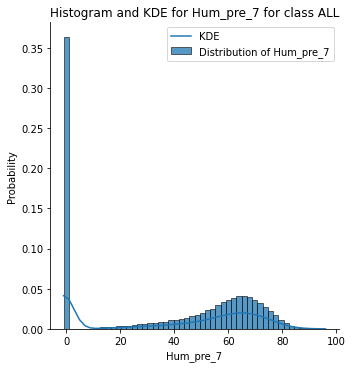

In [2]:
x = np.linspace(min_amount, max_amount, num=50)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 50)

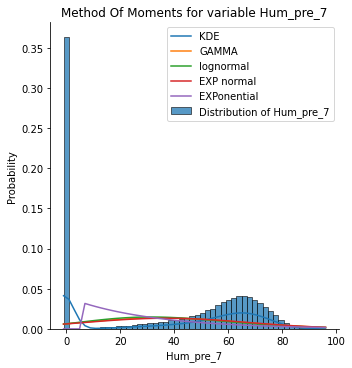

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9011061603669721, pvalue=1.154939369281876e-50), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=12.217808870343172, pvalue=1.5160582789164323e-09)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9283911522000926, pvalue=1.1204551157006495e-57), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=13.349969195117696, pvalue=2.2021562351426383e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.8914436919714216, pvalue=1.2359234561896775e-48), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=11.834525189810531, pvalue=8.134913853652392e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


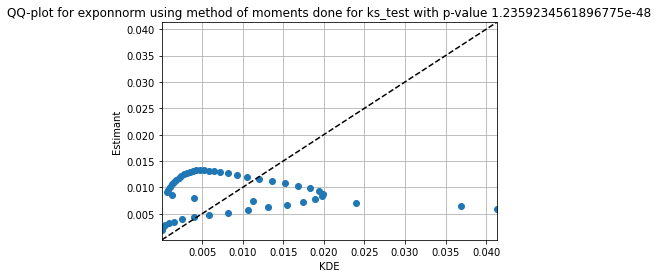

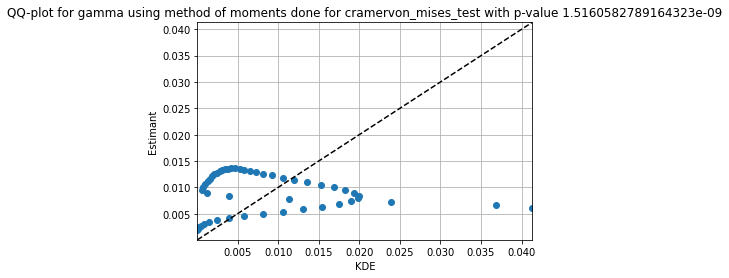

In [3]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

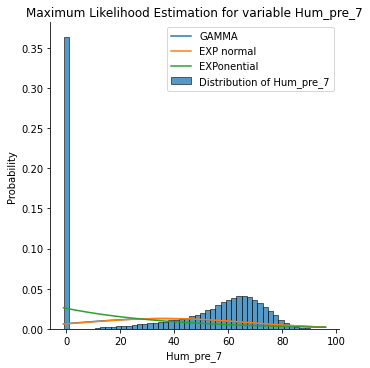

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.8835329085554986, pvalue=4.237140911624828e-47), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=11.528220445083901, pvalue=5.072255948590509e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.8847196216845857, pvalue=2.5309646948566347e-47), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=11.573551557246939, pvalue=5.448060891311002e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9729706009571236, pvalue=7.81356973403372e-79), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=15.385211636699998, pvalue=2.9538317347643783e-09)


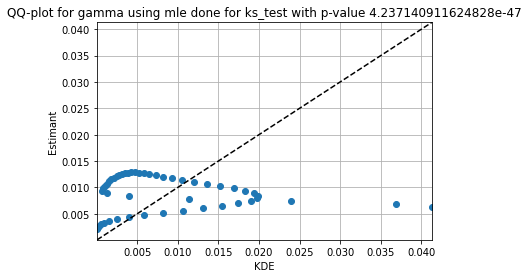

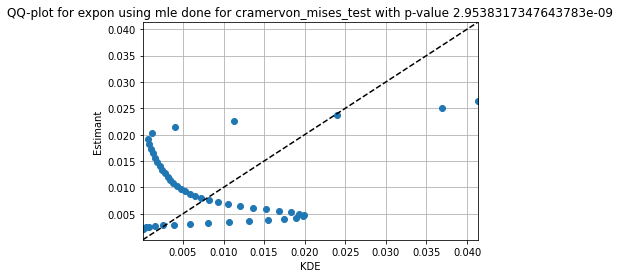

In [4]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

[6.17488602e-03 4.86286984e+01 4.05516333e+01]
[ 44.53060945 126.27832821  30.8278848 ]


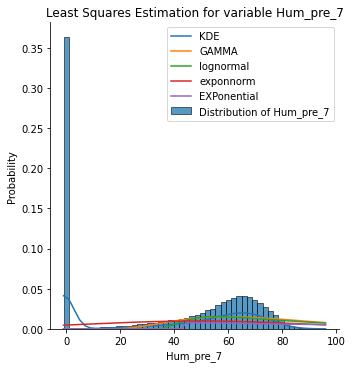

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.8857657193444326, pvalue=1.60024018490612e-47), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=11.612295710969551, pvalue=5.788707291287665e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


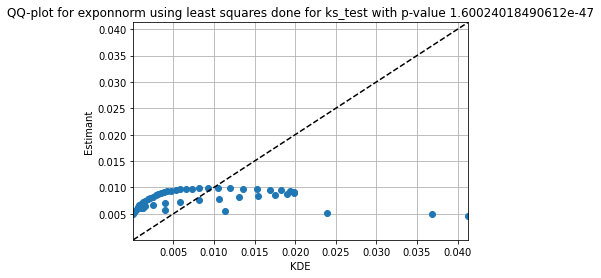

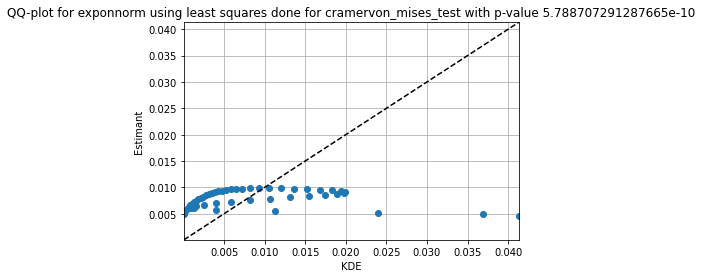

In [5]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

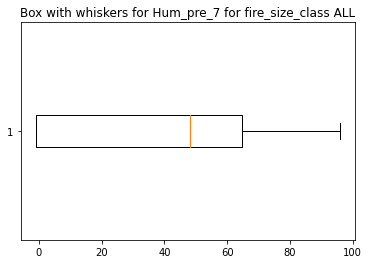

In [6]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()